# Fruit Image Classification using VGG19
This notebook is written end executed by **Dr Raheel Siddiqi** on 08-05-2019. The notebook presents an experiment to classify fruit images using *tranfer learning*. [Fruits 360](https://www.kaggle.com/moltean/fruits) dataset (containing 52262 training images and 17540 test images belonging to **101** fruit classes) has been exploited for the task. The model designed uses **VGG19** pre-trained model as the convolutional base.
## Setting up the model

In [1]:
from tensorflow.python.keras.applications.vgg19 import VGG19

conv_base=VGG19(weights='imagenet',include_top=False,input_shape=(100,100,3))

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [3]:
import os
import numpy as np
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(101, activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2359808   
_________________________________________________________________
dense_1 (Dense)              (None, 101)               51813     
Total params: 22,436,005
Trainable params: 22,436,005
Non-trainable params: 0
_________________________________________________________________


## Setting up Training and Validation Data

In [6]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Training'

In [7]:
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Test'

In [8]:
from tensorflow.python.keras import optimizers

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(100, 100),
        batch_size=32)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=32, shuffle=False)

Found 52262 images belonging to 101 classes.
Found 17540 images belonging to 101 classes.


## Model Training

In [10]:
import math

history = model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(52262//32),
      epochs=50,
      validation_data=validation_generator,
      validation_steps=math.ceil(17540//32))

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1634/1634 [==============================] - 1035s 633ms/step - loss: 1.7898 - categorical_accuracy: 0.5150 - val_loss: 0.5072 - val_categorical_accuracy: 0.8326
Epoch 2/50
1634/1634 [==============================] - 562s 344ms/step - loss: 0.2902 - categorical_accuracy: 0.9071 - val_loss: 0.0925 - val_categorical_accuracy: 0.9684
Epoch 3/50
1634/1634 [==============================] - 557s 341ms/step - loss: 0.1640 - categorical_accuracy: 0.9480 - val_loss: 0.0839 - val_categorical_accuracy: 0.9745
Epoch 4/50
1634/1634 [==============================] - 555s 340ms/step - loss: 0.1196 - categorical_accuracy: 0.9626 - val_loss: 0.1421 - val_categorical_accuracy: 0.9497
Epoch 5/50
1634/1634 [==============================] - 551s 337ms/step - loss: 0.1184 - categorical_accuracy: 0.9674 - val_loss: 0.1003 - val_categorical_accuracy: 0.9684
Epoch 6/50
1634/1634 [==============================] - 550s 337ms/step - loss: 0.0834 - ca

1634/1634 [==============================] - 585s 358ms/step - loss: 0.0344 - categorical_accuracy: 0.9908 - val_loss: 0.0272 - val_categorical_accuracy: 0.9916
Epoch 30/50
1634/1634 [==============================] - 581s 356ms/step - loss: 0.0196 - categorical_accuracy: 0.9946 - val_loss: 0.0140 - val_categorical_accuracy: 0.9946
Epoch 31/50
1634/1634 [==============================] - 580s 355ms/step - loss: 0.0322 - categorical_accuracy: 0.9930 - val_loss: 0.0268 - val_categorical_accuracy: 0.9913
Epoch 32/50
1634/1634 [==============================] - 579s 355ms/step - loss: 0.0245 - categorical_accuracy: 0.9937 - val_loss: 0.0454 - val_categorical_accuracy: 0.9942
Epoch 33/50
1634/1634 [==============================] - 579s 354ms/step - loss: 0.0182 - categorical_accuracy: 0.9954 - val_loss: 0.0291 - val_categorical_accuracy: 0.9956
Epoch 34/50
1634/1634 [==============================] - 579s 354ms/step - loss: 0.0333 - categorical_accuracy: 0.9923 - val_loss: 0.0464 - val_cat

In [11]:
import matplotlib.pyplot as plt

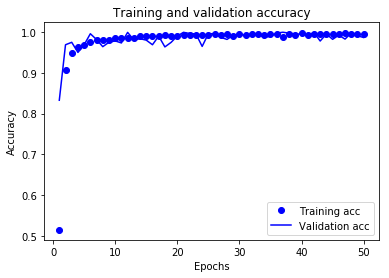

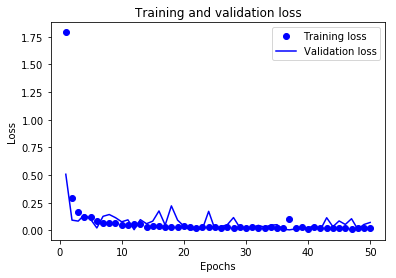

In [12]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('fruit_image_classification_101_classes_transfer learning_vgg19_data augmentation_a',format='png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('fruit_image_classification_101_classes_transfer learning_vgg19_data augmentation_b',format='png')
plt.show()

## Model Evaluation

In [13]:
steps_test=int(17540/32)
print(steps_test)

548


In [14]:
result = model.evaluate_generator(validation_generator, steps=steps_test)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

Test-set classification accuracy: 98.61%
